# 1

#### En el ejemplo de teoría hemos visto la forma de entrenar utilizando un trozo de datos como en la imagen "way1.png". 

(Básicamente, tener en cuenta más datos de entrenamiento [[20% de test]])

Investiga la forma de realizar el ejercicio a partir del gif "way3_sliding_window.gif":

- ¿Da mejores resultados entrenar el modelo así?

Algo muy típico en el trabajo de data scientist

![](../rnn/sliding_windows_google.png)

## IMPORTS, LOAD DATA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

## n = 0.5 

In [2]:
N = 3000 
n = 0.5 # Para establecer el conjunto de datos que quiero coger

In [3]:
New = int(N * n)
Tp = int(0.8 * N * n)

t= np.arange(0,N)
x= (2*np.sin(0.02*t)*np.sin(0.003*t))+0.5*np.random.normal(size=N)
df = pd.DataFrame(x, columns=['Data'])


## TRAIN, TEST

In [4]:
values = df.values
train = values[0:Tp, : ]
test = values[Tp:New, : ] 

In [5]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)
print("N shape:", New)

Train data length: (1200, 1)
Test data length: (300, 1)
N shape: 1500


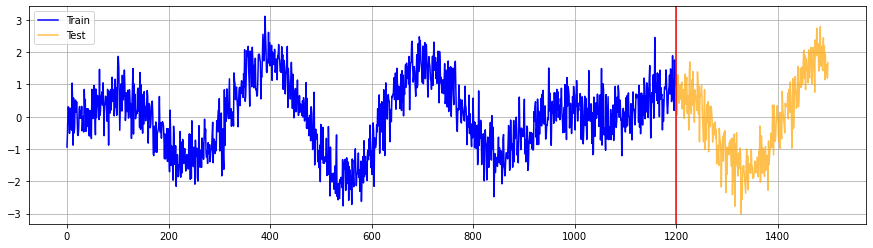

In [6]:
index = df.index.values
plt.figure(figsize=(15,4))
plt.plot(index[0:Tp],train,c='blue')
plt.plot(index[Tp:New],test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.axvline(df.index[Tp], c="r")
plt.grid(True)
plt.show()

In [7]:
step = 4

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
print(test.shape)
print(train.shape)

(304,)
(1204,)


In [8]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [9]:
trainX,trainY = convertToMatrix(train,step)
testX,testY = convertToMatrix(test,step)

print("trainX.shape:", trainX.shape)

trainX.shape: (1200, 4)


In [10]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [11]:
print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (1200, 1, 4) ,  (1200,)
Test data shape: (300, 1, 4) ,  (300,)


## LSTM LAYER

In [12]:
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM

In [13]:
model = Sequential()
# Long short term memory
model.add(LSTM(units=128, input_shape=(1,4), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.001),metrics=['mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               68096     
_________________________________________________________________
dense (Dense)                (None, 32)                4128      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 72,257
Trainable params: 72,257
Non-trainable params: 0
_________________________________________________________________
C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## FIT THE MODEL

In [14]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        if (epoch+1) % 50 == 0 and epoch>0:
            print("Epoch number {} done".format(epoch+1))

In [15]:
batch_size = 16
num_epochs = 100

In [16]:
model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size, 
          callbacks=[MyCallback()],verbose=0)

Epoch number 50 done
Epoch number 100 done


In [17]:
model.save("my_modelL.h5")

## Predictions

In [18]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict,testPredict),axis=0)

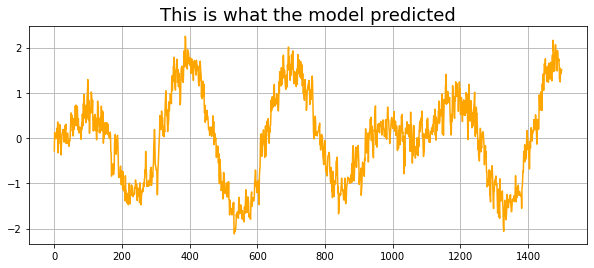

In [19]:
plt.figure(figsize=(10,4))
plt.title("This is what the model predicted",fontsize=18)
plt.plot(predicted,c='orange')
plt.grid(True)
plt.show()

In [20]:
predicted.shape

(1500, 1)

In [21]:
error = predicted[Tp:New]-df[Tp:New]
error = np.array(error).ravel()

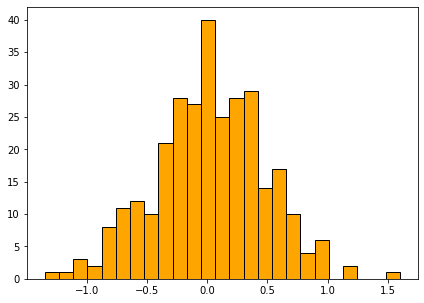

In [22]:
plt.figure(figsize=(7,5))
plt.hist(error,bins=25,edgecolor='k',color='orange')
plt.show()

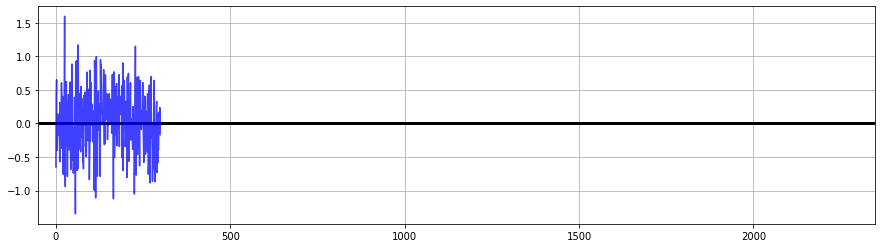

In [23]:
plt.figure(figsize=(15,4))
plt.plot(error,c='blue',alpha=0.75)
plt.hlines(y=0,xmin=-50,xmax=2400,color='k',lw=3)
plt.xlim(-50,2350)
plt.grid(True)
plt.show()

## n = 0.75

In [24]:
n = 0.75

In [25]:
New = int(N * n)
Tp = int(0.8 * N * n)

t= np.arange(0,N)
x= (2*np.sin(0.02*t)*np.sin(0.003*t))+0.5*np.random.normal(size=N)
df = pd.DataFrame(x, columns=['Data'])


### 2. TRAIN, TEST

Train data length: (1800, 1)
Test data length: (450, 1)
N shape: 2250


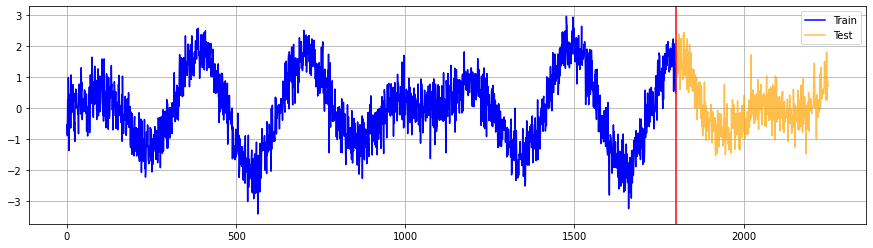

(454,)
(1804,)


In [28]:
values = df.values
train = values[0:Tp, : ]
test = values[Tp:New, : ] 

print("Train data length:", train.shape)
print("Test data length:", test.shape)
print("N shape:", New)

index = df.index.values
plt.figure(figsize=(15,4))
plt.plot(index[0:Tp],train,c='blue')
plt.plot(index[Tp:New],test,c='orange',alpha=0.7)
plt.legend(['Train','Test'])
plt.axvline(df.index[Tp], c="r")
plt.grid(True)
plt.show()

step = 4

# add step elements into train and test
test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
print(test.shape)
print(train.shape)

In [37]:
def convertToMatrix(data, step):
    X, Y =[], []
    for i in range(len(data)-step):
        d=i+step  
        X.append(data[i:d,])
        Y.append(data[d,])
    return np.array(X), np.array(Y)

In [44]:
trainX,trainY = convertToMatrix(train,step)
testX,testY = convertToMatrix(test,step)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (1800, 1, 4) ,  (1800,)
Test data shape: (450, 1, 4) ,  (450,)


### LSTM LAYER

In [45]:
model = Sequential()
# Long short term memory
model.add(LSTM(units=128, input_shape=(1,4), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=RMSprop(lr=0.001),metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 128)               68096     
_________________________________________________________________
dense_6 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 33        
Total params: 72,257
Trainable params: 72,257
Non-trainable params: 0
_________________________________________________________________
C:\Users\xyang\AppData\Local\Programs\Python\Python37\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


### FIT THE MODEL

In [47]:
batch_size = 16
num_epochs = 100



In [48]:
model.fit(trainX,trainY, 
          epochs=num_epochs, 
          batch_size=batch_size)

Epoch 1/100
113/113 [==============================] - 1s 2ms/step - loss: 0.4749 - mse: 0.4749
Epoch 2/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3210 - mse: 0.3210
Epoch 3/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3206 - mse: 0.3206
Epoch 4/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3181 - mse: 0.3181
Epoch 5/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3182 - mse: 0.3182
Epoch 6/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3172 - mse: 0.3172
Epoch 7/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3168 - mse: 0.3168
Epoch 8/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3153 - mse: 0.3153
Epoch 9/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3168 - mse: 0.3168
Epoch 10/100
113/113 [==============================] - 0s 2ms/step - loss: 0.3140 - mse: 0.3140
Epoch 11/100
113/113 [=================

In [49]:
model.save("my_modelL.h6")

INFO:tensorflow:Assets written to: my_modelL.h6\assets


### PREDICTIONS

In [50]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
predicted = np.concatenate((trainPredict,testPredict),axis=0)

In [51]:
error = predicted[Tp:New]-df[Tp:New]
error = np.array(error).ravel()

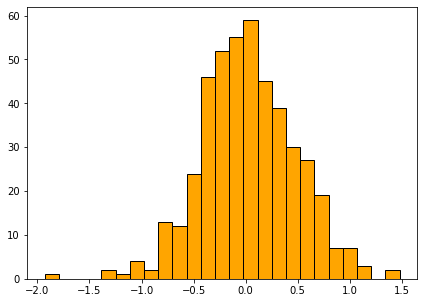

In [52]:
plt.figure(figsize=(7,5))
plt.hist(error,bins=25,edgecolor='k',color='orange')
plt.show()

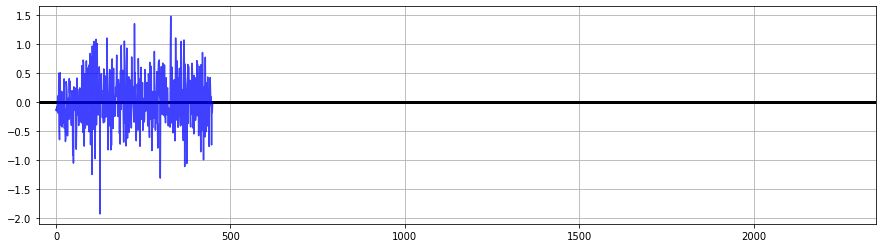

In [53]:
plt.figure(figsize=(15,4))
plt.plot(error,c='blue',alpha=0.75)
plt.hlines(y=0,xmin=-50,xmax=2400,color='k',lw=3)
plt.xlim(-50,2350)
plt.grid(True)
plt.show()